# NOAA Record Temps Visualization


-- A NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. 
-- Note: The data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe. The data is from stations located near **Ann Arbor, Michigan, United States**. Each row in the assignment datafile corresponds to a single observation.

The following variables are included:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

-- The visualization shows historical max and min temperatures for each day of the year, over a period of 11 years (2005-2015). It then layers a scatterplot of the days in 2015 that broke previous records.

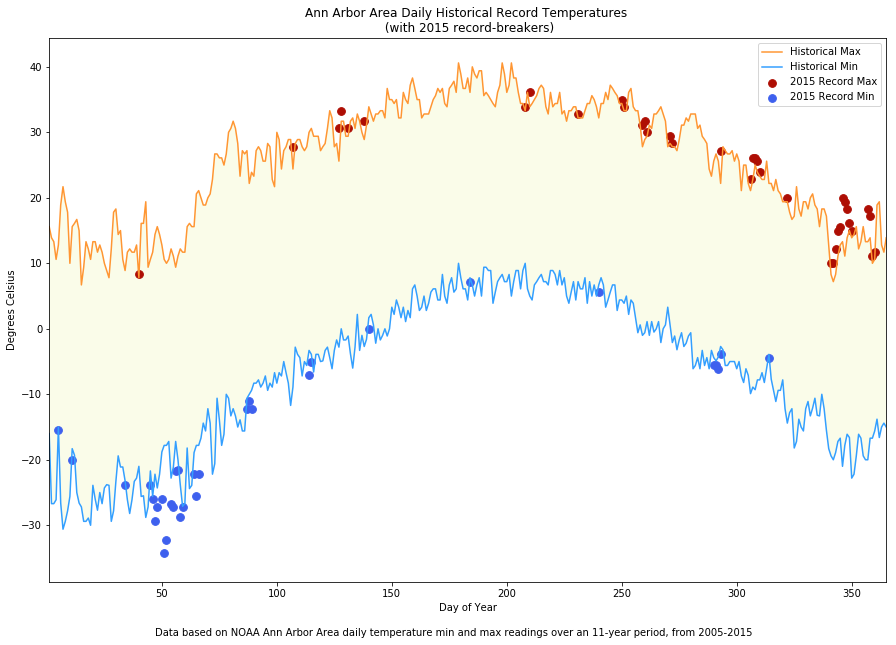

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import datetime

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#### Prep Data

# Convert to degrees Celsius
df["Data_Value"] = df["Data_Value"] / 10
# Make Date a datetime type
df["Date"] = pd.to_datetime(df["Date"])
# Add column for Day of Year
df["Day_of_Year"] = df["Date"].dt.dayofyear
# Add column for Year
df["Year"] = df["Date"].dt.year
# Drop rows for Leap Day (DOY 60 and year = 2008 or 2012)
df.drop( df[ (df["Day_of_Year"] == 60) & ((df["Year"] == 2008) | (df["Year"] == 2012)) ].index , inplace=True)
# Decrement DOY for leap year dates falling after leap day
mask = ((df.Day_of_Year > 60) & ((df.Year == 2008) | (df.Year == 2012)))
df.loc[mask,"Day_of_Year"] = df["Day_of_Year"] - 1

# Drop rows from Year 2015
df_hist = df[df["Year"] != 2015]

# Create df for TMAX
df_TMAX = df_hist.groupby("Day_of_Year",as_index=False).max()
# Create df for TMIN
df_TMIN = df_hist.groupby("Day_of_Year",as_index=False).min()

#### Plot TMAX & TMIN
ax = plt.gca()
df_TMAX.plot(x='Day_of_Year',y='Data_Value', color='#FF9633', label = 'Historical Max', figsize=(15,10), ax=ax)
df_TMIN.plot(x='Day_of_Year',y='Data_Value', color='#339FFF', label = 'Historical Min', ax=ax)
# Fill in area between lines
plt.fill_between(df_TMAX.Day_of_Year, df_TMAX.Data_Value, df_TMIN.Data_Value, facecolor='#FAFCE9')

#### Scatterplot the 2015 record-breakers

df_2015 = df[df["Year"] == 2015]

# TMAX:
df_TMAX_2015 = df_2015.groupby("Day_of_Year",as_index=False).max()
df_TMAX_2015 = df_TMAX_2015.rename(columns={"Data_Value": "Max_Data_Value_2015"})
# Merge History + 2015 Maxes
df_TMAX_2015 = pd.merge(df_TMAX_2015, df_TMAX, how='inner', on='Day_of_Year')
# Filter out non-record-breakers
df_TMAX_2015 = df_TMAX_2015[(df_TMAX_2015["Max_Data_Value_2015"] > df_TMAX_2015["Data_Value"])]
df_TMAX_2015.plot(kind='scatter',x='Day_of_Year',y='Max_Data_Value_2015', c='#AE0E04', label = '2015 Record Max', s=60, ax=ax)

# TMIN:
df_TMIN_2015 = df_2015.groupby("Day_of_Year",as_index=False).min()
df_TMIN_2015 = df_TMIN_2015.rename(columns={"Data_Value": "Min_Data_Value_2015"})
# Merge History + 2015 Mins
df_TMIN_2015 = pd.merge(df_TMIN_2015, df_TMIN, how='inner', on='Day_of_Year')
# Filter out non-record-breakers
df_TMIN_2015 = df_TMIN_2015[(df_TMIN_2015["Min_Data_Value_2015"] < df_TMIN_2015["Data_Value"])]
df_TMIN_2015.plot(kind='scatter',x='Day_of_Year',y='Min_Data_Value_2015', c='#3E60EE', label = '2015 Record Min', s=60, ax=ax)

# Add ornaments
plt.title('Ann Arbor Area Daily Historical Record Temperatures \n (with 2015 record-breakers)')
plt.xticks
plt.xlabel('Day of Year')
plt.ylabel('Degrees Celsius')
plt.figtext(0.5, 0.05, 'Data based on NOAA Ann Arbor Area daily temperature min and max readings over an 11-year period, from 2005-2015', wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


